In [1]:
# importing the libraries needed

import numpy as np     
import nashpy as nash
import axelrod as axl
import time
import random

In [2]:
# removing those strategies which 'cheat' and those which have a longer running time 
# (for the purposes of testing on personal computer)

filterset  = {
    'long_run_time': False,
    'manipulates_state': False,
    'manipulates_source': False,
    'inspects_source': False
}

strategies = axl.filtered_strategies(filterset)
strategies.remove(axl.Defector) # Defector is always included - so is removed from the list of possible participants

#opponents = random.sample(strategies, 4)
#list_of_players = [opponents[i]() for i in range(4)]
#list_of_players.append(axl.Defector())
#print(list_of_players)

In [3]:
#import random
#opponents = random.sample(strategies, 3)
#list_of_players = [opponents[0](), opponents[1](), opponents[2](), axl.Defector()]
#print(opponents)

#repeats = 100
#epsilon = 0.001

#probs = np.linspace(epsilon, 1 - epsilon, 100) #obtaining 500 points for the prob. of a game p, 0 < p < 1
#least_prob_of_defect_equilibria2 = [] #creating an empty list

#for p in probs:
 #   axl.seed(0) #setting the seed so we obtain the same results
  #  players2 = list_of_players
   # tournament2 = axl.Tournament(players2, prob_end=p, repetitions=repeats)  #we wish the tournament to be repeated 'repeat' times with a probablistic ending given by p
    #results2 = tournament2.play(progress_bar=False) #play the tournament
   # payoff_matrix2 = np.array(results2.payoff_matrix) #we wish to obtain the mean payoffs for each player in a matrix
   # game2 = nash.Game(payoff_matrix2, payoff_matrix2.transpose()) #creating a game from the matrix obtained
   # least_prob_of_defect_equilibria2.append(
   #     min([sigma_1[-1] for sigma_1, _ in game2.support_enumeration()])
   # )  #we wish to obtain a list of the smallest probability of defection in any equilibria in order to plot.


In [3]:
def experiment(no_of_players, computing_eq_strategy):
    
    """ 
    A function which will be used to test the run times of the tournaments, with varying number of players 
    & varying algorithms for computing the Nash Equilibria 
    """
    
    opponents = random.sample(strategies, no_of_players)
    list_of_players = [opponents[i]() for i in range(no_of_players)]
    list_of_players.append(axl.Defector())
    repeats = 5    
    epsilon = 0.001
    probs = np.linspace(epsilon, 1 - epsilon, 5)    #obtaining 5 points for the prob. of a game p, 0 < p < 1
    least_prob_of_defect_equilibria = []    #creating an empty list
    
    for p in probs:
        players = list_of_players
        #we wish the tournament to be repeated 'repeat' times with a probablistic ending given by p
        tournament = axl.Tournament(players, prob_end=p, repetitions=repeats)
        results = tournament.play(progress_bar=False)    #play the tournament
        payoff_matrix = np.array(results.payoff_matrix)    #we wish to obtain the mean payoffs for each player in a matrix
        game = nash.Game(payoff_matrix, payoff_matrix.transpose())    #creating a game from the matrix obtained
       
    
        # we wish to obtain a list of the smallest probability of defection in any equilibria (using the algorithm specified
        # in the function)
        if computing_eq_strategy == 'Support Enumeration':
            least_prob_of_defect_equilibria.append(min([sigma_1[-1] for sigma_1, _ in game.support_enumeration()]))
    
        elif computing_eq_strategy == 'Vertex Enumeration':
            least_prob_of_defect_equilibria.append(min([sigma_1[-1] for sigma_1, _ in game.vertex_enumeration()]))
            
        elif computing_eq_strategy == 'Lemke Howson':
            least_prob_of_defect_equilibria.append(min([sigma_1[-1] for sigma_1, _ in game.lemke_howson_enumeration()]))
    

In [5]:
time_taken = []    # creating an empty list
for play in list(range(1, 10)):   # running the experiment for 2 to 10 players [taking into account the defector]
    start = time.perf_counter()    # obtaining the initial time
    experiment(play, "Support Enumeration")  # running the PD tournaments for the specified no. of players with the support
                                             # enumeration algorithm
    end = time.perf_counter()    # obtaining the end time
    time_taken.append(end - start)    # we wish to find out the execution time for the tournament
print(time_taken)

C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (4) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\support_enumeration.p

[3.224302699999999, 4.355340300000002, 5.429865500000002, 8.481085299999997, 38.4461545, 84.35074170000001, 196.17438449999997, 575.0079303, 1997.4166137000002]


In [6]:
time_taken2 = []    # creating an empty list
for play in list(range(1, 10)):   # running the experiment for 2 to 10 players [taking into account the defector]
    start = time.perf_counter()    # obtaining the initial time
    experiment(play, "Vertex Enumeration")  # running the PD tournaments for the specified no. of players with the vertex
                                             # enumeration algorithm
    end = time.perf_counter()    # obtaining the end time
    time_taken2.append(end - start)    # we wish to find out the execution time for the tournament
print(time_taken2)

[1.0352835999997296, 1.5107836000001953, 20.59955149999996, 5.0639532000000145, 2.8823216000000684, 4.834144899999956, 5.860957800000051, 9.211563900000328, 27.59486089999973]


In [7]:
time_taken3 = []    # creating an empty list
for play in list(range(1, 10)):   # running the experiment for 2 to 10 players [taking into account the defector]
    start = time.perf_counter()    # obtaining the initial time
    experiment(play, "Lemke Howson")  # running the PD tournaments for the specified no. of players with the support
                                             # enumeration algorithm
    end = time.perf_counter()    # obtaining the end time
    time_taken3.append(end - start)    # we wish to find out the execution time for the tournament
print(time_taken3)

C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:31: RuntimeWarning: invalid value encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:61: RuntimeWarning: invalid value encountered in true_divide
  return strategy / sum(strategy)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:132: RuntimeWarning: The Lemke Howson algorithm has returned probability vectors of 
incorrect shapes. This indicates an error. Your game could be degenerate.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:31: RuntimeWarning: divide by zero encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:31: RuntimeWarning: divide by zero encountered 

[1.029457900000125, 1.327557699999943, 8.425029099999847, 1.9238083000000188, 2.0295548999997663, 3.444364200000109, 4.836052299999665, 19.481743800000004, 16.820969000000332]


<function matplotlib.pyplot.show(*args, **kw)>

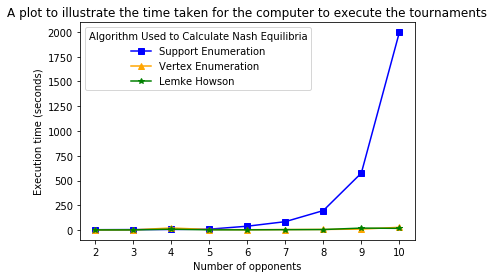

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

graph1 = plt.figure()
plt.xlabel("Number of opponents" )
plt.ylabel("Execution time (seconds)")
plt.title("A plot to illustrate the time taken for the computer to execute the tournaments")
plt.plot(list(range(2, 11)), time_taken, 'blue', marker='s', label='Support Enumeration')
plt.plot(list(range(2, 11)), time_taken2, 'orange', marker='^', label='Vertex Enumeration')
plt.plot(list(range(2, 11)), time_taken3, 'green', marker='*', label='Lemke Howson')
plt.legend(loc='upper left', title='Algorithm Used to Calculate Nash Equilibria')
plt.show

In [ ]:
time_taken4 = []    # creating an empty list
for play in range(10, 20):   # running the experiment for 2 to 10 players [taking into account the defector]
    start = time.perf_counter()    # obtaining the initial time
    experiment(play, computing_eq_strategy"Vertex Enumeration")  # running the PD tournaments for the specified no. of players with the vertex
                                             # enumeration algorithm
    end = time.perf_counter()    # obtaining the end time
    time_taken4.append(end - start)    # we wish to find out the execution time for the tournament
print(time_taken4)

In [4]:
time_taken5 = []    # creating an empty list
for play in range(10, 20):   # running the experiment for 2 to 10 players [taking into account the defector]
    start = time.perf_counter()    # obtaining the initial time
    experiment(play, "Lemke Howson")  # running the PD tournaments for the specified no. of players with the support
                                             # enumeration algorithm
    end = time.perf_counter()    # obtaining the end time
    time_taken5.append(end - start)    # we wish to find out the execution time for the tournament
print(time_taken5)

C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:31: RuntimeWarning: invalid value encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:61: RuntimeWarning: invalid value encountered in true_divide
  return strategy / sum(strategy)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:132: RuntimeWarning: The Lemke Howson algorithm has returned probability vectors of 
incorrect shapes. This indicates an error. Your game could be degenerate.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:31: RuntimeWarning: divide by zero encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:54: RuntimeWarning: overflow encountered in mul

C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:61: RuntimeWarning: invalid value encountered in true_divide
  return strategy / sum(strategy)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:132: RuntimeWarning: The Lemke Howson algorithm has returned probability vectors of 
incorrect shapes. This indicates an error. Your game could be degenerate.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:31: RuntimeWarning: divide by zero encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:54: RuntimeWarning: overflow encountered in multiply
  tableau[i, :] * pivot_element
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:55: RuntimeWarning: overflow encountered in multiply
  - tableau[pivot_row_index, :] 

C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:54: RuntimeWarning: overflow encountered in multiply
  tableau[i, :] * pivot_element
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:55: RuntimeWarning: overflow encountered in multiply
  - tableau[pivot_row_index, :] * tableau[i, column_index]
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:55: RuntimeWarning: invalid value encountered in subtract
  - tableau[pivot_row_index, :] * tableau[i, column_index]
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:57: RuntimeWarning: invalid value encountered in double_scalars
  vertex.append(tableau[i, -1] / row)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:31: RuntimeWarning: divide by zero encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])
C:\Users\sophi\Anaconda3\lib\site-p

C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:31: RuntimeWarning: divide by zero encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:31: RuntimeWarning: invalid value encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:61: RuntimeWarning: invalid value encountered in true_divide
  return strategy / sum(strategy)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:57: RuntimeWarning: invalid value encountered in double_scalars
  vertex.append(tableau[i, -1] / row)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:54: RuntimeWarning: overflow encountered in multiply
  tableau[i, :] * pivot_element
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\intege

C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:132: RuntimeWarning: The Lemke Howson algorithm has returned probability vectors of 
incorrect shapes. This indicates an error. Your game could be degenerate.
  warnings.warn(msg, RuntimeWarning)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:31: RuntimeWarning: invalid value encountered in true_divide
  return np.argmax(tableau[:, column_index] / tableau[:, -1])
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:61: RuntimeWarning: invalid value encountered in true_divide
  return strategy / sum(strategy)
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:54: RuntimeWarning: invalid value encountered in multiply
  tableau[i, :] * pivot_element
C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\integer_pivoting\integer_pivoting.py:54: RuntimeWarning: overflow encountered in multiply
  tableau[i, :] * pivot_elem

C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\lemke_howson.py:132: RuntimeWarning: The Lemke Howson algorithm has returned probability vectors of 
incorrect shapes. This indicates an error. Your game could be degenerate.
  warnings.warn(msg, RuntimeWarning)


[17.396347800000058, 48.84611040000004, 28.425117900000032, 49.97527530000002, 67.21723760000009, 121.84106469999995, 39.15916040000002, 373.10687459999997, 114.08535189999998, 109.29781630000002]


In [ ]:
graph1 = plt.figure()
plt.xlabel("Number of opponents" )
plt.ylabel("Execution time (seconds)")
plt.title("A plot to illustrate the time taken for the computer to execute the tournaments")
plt.plot(list(range(11, 21)), time_taken4, 'orange', marker='^', label='Vertex Enumeration')
plt.plot(list(range(11, 21)), time_taken5, 'green', marker='*', label='Lemke Howson')
plt.legend(loc='upper left', title='Algorithm Used to Calculate Nash Equilibria')
plt.show